In [33]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests



In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

60.99162774477736 -71.92689863323028
67.31136575752936 -163.2525988053039
71.19066015031203 134.95481033553773
-9.79859539900636 -82.231555245448
58.90863797336917 73.08935003072548
81.79575446060056 35.76890251504534
-31.693022439008764 149.37631508144142
0.01033783784617981 59.48636046253887
15.955856938288719 -6.398050755808072
16.82456102631032 -86.33820345339709
-70.52433487219297 -132.02815385956188
78.64566276498735 -136.6667889048531
-49.69883143285662 57.32973348617742
-7.015770784378091 61.28414587282026
-79.22793809731556 88.47563730967534
76.46747221436601 -17.238557881922247
-59.33465268908128 10.452662681101174
-25.935855881488507 -113.0481104363589
89.56681418689408 177.77338367518678
13.592710223497633 57.59038644125417
-62.672401454786424 114.96987047064806
46.69909157042753 -34.787912802001784
-16.40452932079782 135.4511694006785
-76.24099681741102 52.0169536614857
-34.49943982881718 -69.58984645740203
62.59125388884172 26.099106988608213
-55.32178121117016 -131.68549

-48.27825341883577 -52.60530962464499
28.598844573632206 -16.553185938794087
-52.99954412566823 -162.26396211458632
-5.645254557268416 -95.08974645740889
74.92557548959866 168.29173737382786
-31.969184422247174 -25.551136842921267
25.017607698574977 42.475307197552326
-62.65653277085002 -114.32948656606135
31.790481514589032 0.2572726300847137
-34.11929831137172 68.04116579557586
-27.344148343160256 -75.63073002564832
67.13597173387899 107.1989363022891
-20.290323888281407 -167.53291465959003
-10.342633480205663 109.16804132496276
22.577865961501857 101.98779590070063
25.99808626108073 -145.77490279546163
-44.02833858655478 12.029288912657478
-31.493570373512 -61.4504152723468
-16.117237514172146 -150.5798338985119
-34.36446246508002 -30.66954058748118
-23.24214162456701 -135.9518382934556
83.86025316614092 -13.483958166779644
13.15810050519596 5.369454801197065
-5.420722292391375 136.4735188660439
-32.49815867607441 -20.96182177739695
11.542934902762426 -76.62361914709356
42.686469097

In [23]:
from citipy import citipy

In [24]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

637

In [25]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [26]:
# Import the API key.
from config import weather_api_key
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [47]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | iqaluit
Processing Record 2 of Set 1 | nome
Processing Record 3 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 4 of Set 1 | chicama
Processing Record 5 of Set 1 | tevriz
Processing Record 6 of Set 1 | vardo
Processing Record 7 of Set 1 | mudgee
Processing Record 8 of Set 1 | victoria
Processing Record 9 of Set 1 | nara
Processing Record 10 of Set 1 | french harbor
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | tuktoyaktuk
Processing Record 13 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 14 of Set 1 | busselton
Processing Record 15 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 16 of Set 1 | hermanus
Processing Record 17 of Set 1 | leningradskiy
Processing Record 18 of Set 1 | salalah
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | ribeira grande
Processing Record 21 of Set 1 | ng

Processing Record 41 of Set 4 | cabedelo
Processing Record 42 of Set 4 | aksu
Processing Record 43 of Set 4 | coihaique
Processing Record 44 of Set 4 | fulitun
City not found. Skipping...
Processing Record 45 of Set 4 | sao filipe
Processing Record 46 of Set 4 | ewa beach
Processing Record 47 of Set 4 | mayor pablo lagerenza
Processing Record 48 of Set 4 | nokaneng
Processing Record 49 of Set 4 | turukhansk
Processing Record 50 of Set 4 | kankon
Processing Record 1 of Set 5 | santa isabel do rio negro
Processing Record 2 of Set 5 | aklavik
Processing Record 3 of Set 5 | eyl
Processing Record 4 of Set 5 | champerico
Processing Record 5 of Set 5 | khandyga
Processing Record 6 of Set 5 | urdzhar
City not found. Skipping...
Processing Record 7 of Set 5 | san pedro
Processing Record 8 of Set 5 | mitsamiouli
Processing Record 9 of Set 5 | barentsburg
City not found. Skipping...
Processing Record 10 of Set 5 | jumla
Processing Record 11 of Set 5 | murray bridge
Processing Record 12 of Set 5 |

Processing Record 29 of Set 8 | abashiri
Processing Record 30 of Set 8 | havre
Processing Record 31 of Set 8 | mizan teferi
Processing Record 32 of Set 8 | ankang
Processing Record 33 of Set 8 | barcelona
Processing Record 34 of Set 8 | verkhniy rohachyk
Processing Record 35 of Set 8 | gardan diwal
City not found. Skipping...
Processing Record 36 of Set 8 | bulgan
Processing Record 37 of Set 8 | dakar
Processing Record 38 of Set 8 | shepetivka
Processing Record 39 of Set 8 | superior
Processing Record 40 of Set 8 | acapulco
Processing Record 41 of Set 8 | sfantu gheorghe
Processing Record 42 of Set 8 | jardim
Processing Record 43 of Set 8 | la ronge
Processing Record 44 of Set 8 | wanlaweyn
Processing Record 45 of Set 8 | oksfjord
Processing Record 46 of Set 8 | petropavlovsk-kamchatskiy
Processing Record 47 of Set 8 | astoria
Processing Record 48 of Set 8 | ronne
Processing Record 49 of Set 8 | cootamundra
Processing Record 50 of Set 8 | phuket
Processing Record 1 of Set 9 | denpasar


Processing Record 16 of Set 12 | simao
Processing Record 17 of Set 12 | rafaela
Processing Record 18 of Set 12 | sokoto
Processing Record 19 of Set 12 | nabire
Processing Record 20 of Set 12 | cartagena
Processing Record 21 of Set 12 | greenfield
Processing Record 22 of Set 12 | kalmunai
Processing Record 23 of Set 12 | mudanjiang
Processing Record 24 of Set 12 | qasigiannguit
Processing Record 25 of Set 12 | amderma
City not found. Skipping...
Processing Record 26 of Set 12 | padang
Processing Record 27 of Set 12 | prince albert
Processing Record 28 of Set 12 | morgan city
Processing Record 29 of Set 12 | nova olimpia
Processing Record 30 of Set 12 | moerai
Processing Record 31 of Set 12 | puerto el triunfo
Processing Record 32 of Set 12 | apricena
Processing Record 33 of Set 12 | southbridge
Processing Record 34 of Set 12 | avera
Processing Record 35 of Set 12 | vilhena
Processing Record 36 of Set 12 | benjamin hill
Processing Record 37 of Set 12 | necochea
Processing Record 38 of Se

In [48]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Iqaluit,63.7506,-68.5145,33.53,64,75,9.22,CA,2022-10-02 20:51:43
1,Nome,64.5011,-165.4064,39.27,66,0,3.44,US,2022-10-02 20:51:43
2,Chicama,-7.8447,-79.1469,61.34,64,18,10.00,PE,2022-10-02 20:51:44
3,Tevriz,57.5090,72.4042,27.36,84,17,5.08,RU,2022-10-02 20:51:44
4,Vardo,70.3705,31.1107,42.78,87,100,2.30,NO,2022-10-02 20:51:44
5,Mudgee,-32.5943,149.5871,43.79,87,6,3.24,AU,2022-10-02 20:51:45
6,Victoria,22.2855,114.1577,83.32,88,13,5.01,HK,2022-10-02 20:51:45
7,Nara,34.6851,135.8049,69.49,52,92,3.00,JP,2022-10-02 20:48:46
8,French Harbor,16.3500,-86.4333,84.07,80,75,4.61,HN,2022-10-02 20:51:46
9,Rikitea,-23.1203,-134.9692,74.44,65,14,2.30,PF,2022-10-02 20:51:46


In [49]:
new_column_order = list(city_data_df.columns)
new_column_order

['City',
 'Lat',
 'Lng',
 'Max Temp',
 'Humidity',
 'Cloudiness',
 'Wind Speed',
 'Country',
 'Date']

In [50]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1664745262.935818

In [51]:
new_column_order = ["City", "Country", "Date", "Lat", 
                    "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Iqaluit,CA,2022-10-02 20:51:43,63.7506,-68.5145,33.53,64,75,9.22
1,Nome,US,2022-10-02 20:51:43,64.5011,-165.4064,39.27,66,0,3.44
2,Chicama,PE,2022-10-02 20:51:44,-7.8447,-79.1469,61.34,64,18,10.00
3,Tevriz,RU,2022-10-02 20:51:44,57.5090,72.4042,27.36,84,17,5.08
4,Vardo,NO,2022-10-02 20:51:44,70.3705,31.1107,42.78,87,100,2.30
5,Mudgee,AU,2022-10-02 20:51:45,-32.5943,149.5871,43.79,87,6,3.24
6,Victoria,HK,2022-10-02 20:51:45,22.2855,114.1577,83.32,88,13,5.01
7,Nara,JP,2022-10-02 20:48:46,34.6851,135.8049,69.49,52,92,3.00
8,French Harbor,HN,2022-10-02 20:51:46,16.3500,-86.4333,84.07,80,75,4.61
9,Rikitea,PF,2022-10-02 20:51:46,-23.1203,-134.9692,74.44,65,14,2.30


In [58]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

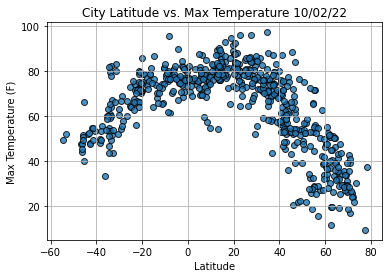

In [53]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

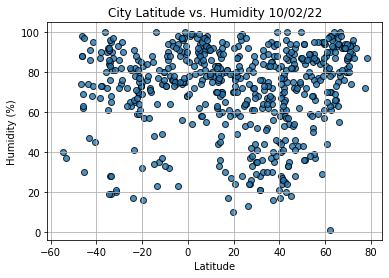

In [54]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

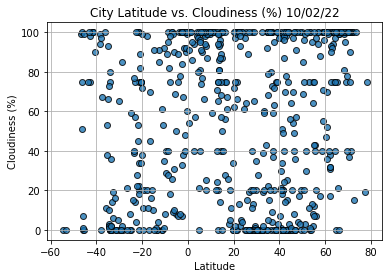

In [55]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()


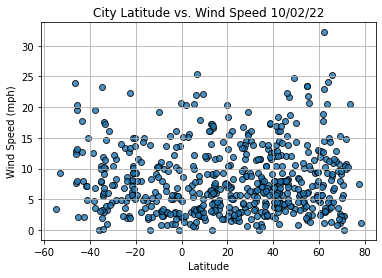

In [56]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [74]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    #Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.show()

In [75]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Iqaluit,CA,2022-10-02 20:51:43,63.7506,-68.5145,33.53,64,75,9.22
1,Nome,US,2022-10-02 20:51:43,64.5011,-165.4064,39.27,66,0,3.44
3,Tevriz,RU,2022-10-02 20:51:44,57.5090,72.4042,27.36,84,17,5.08
4,Vardo,NO,2022-10-02 20:51:44,70.3705,31.1107,42.78,87,100,2.30
6,Victoria,HK,2022-10-02 20:51:45,22.2855,114.1577,83.32,88,13,5.01
...,...,...,...,...,...,...,...,...,...
575,Castel San Giovanni,IT,2022-10-02 21:06:58,45.0583,9.4335,66.58,82,1,3.11
579,Muscatine,US,2022-10-02 21:07:00,41.4667,-91.1335,75.60,41,0,5.75
580,Mattawa,US,2022-10-02 21:06:51,46.7379,-119.9028,84.02,28,0,4.61
581,Muisne,EC,2022-10-02 21:07:00,0.6000,-80.0333,76.51,78,91,8.66


In [85]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Iqaluit,CA,2022-10-02 20:51:43,63.7506,-68.5145,33.53,64,75,9.22
1,Nome,US,2022-10-02 20:51:43,64.5011,-165.4064,39.27,66,0,3.44
3,Tevriz,RU,2022-10-02 20:51:44,57.5090,72.4042,27.36,84,17,5.08
4,Vardo,NO,2022-10-02 20:51:44,70.3705,31.1107,42.78,87,100,2.30
6,Victoria,HK,2022-10-02 20:51:45,22.2855,114.1577,83.32,88,13,5.01


In [86]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

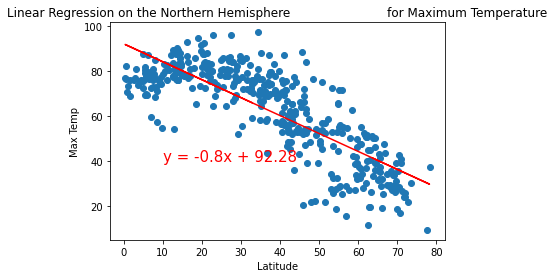

In [87]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

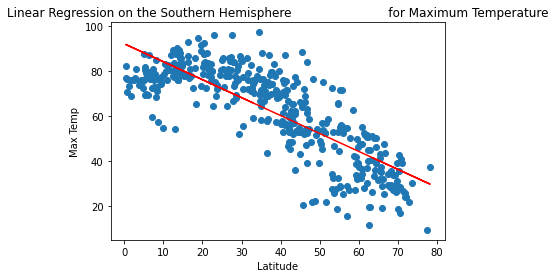

In [89]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

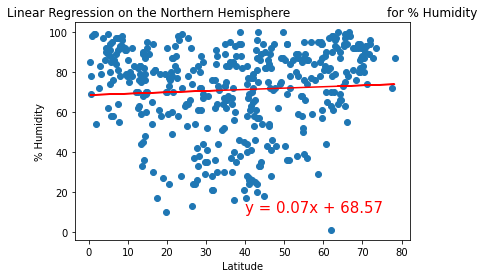

In [90]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

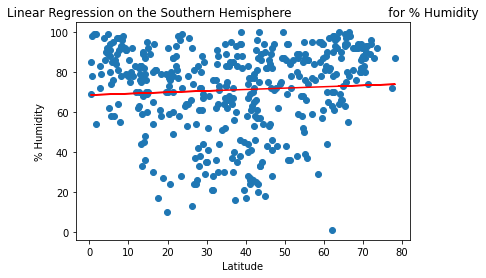

In [91]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

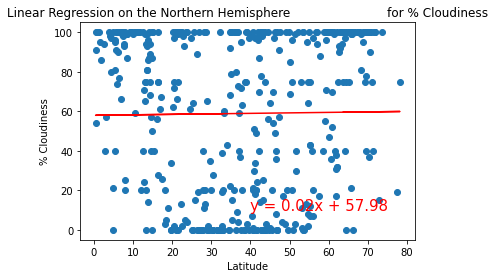

In [92]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

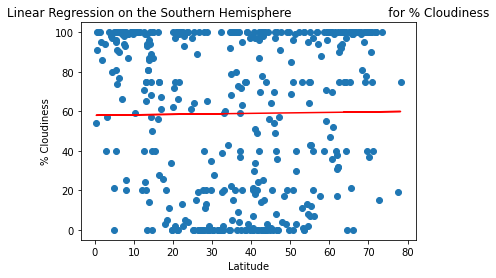

In [93]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

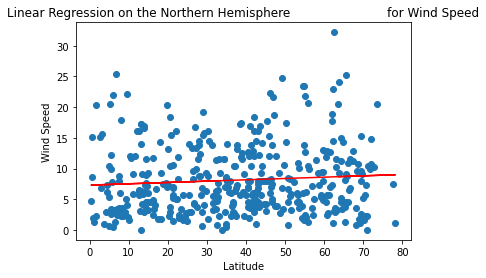

In [94]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

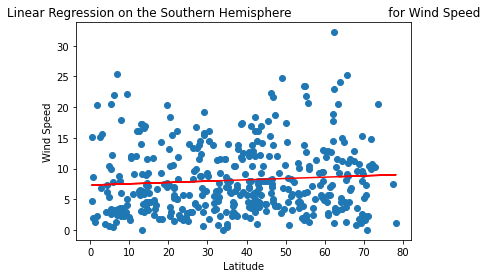

In [95]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))